In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [124]:
file = 'https://raw.githubusercontent.com/amaydixit11/Academics/refs/heads/main/DSL251/data.csv'
data = pd.read_csv(file)

In [125]:
data.head()

,Location Name,Time to Reach (hr),Distance (km),Train Only,Road Only,Train+Road
0,surat,18.0,1020,1,0,0
1,Kolkata,18.0,870,0,0,1
2,Hyderabad,13.5,676,0,0,1
3,Hyderabad,13.5,680,0,0,1
4,Delhi,18.0,977,1,0,0


In [126]:
data.describe()

,Time to Reach (hr),Distance (km),Train Only,Road Only,Train+Road
count,43.000000,43.000000,43.000000,43.000000,43.000000
mean,17.284186,865.558140,0.465116,0.093023,0.465116
std,7.836545,354.869815,0.504685,0.293903,0.504685
min,0.500000,9.000000,0.000000,0.000000,0.000000
25%,13.250000,672.500000,0.000000,0.000000,0.000000
50%,18.000000,861.000000,0.000000,0.000000,0.000000
75%,20.000000,1032.000000,1.000000,0.000000,1.000000
max,48.000000,1782.000000,1.000000,1.000000,1.000000


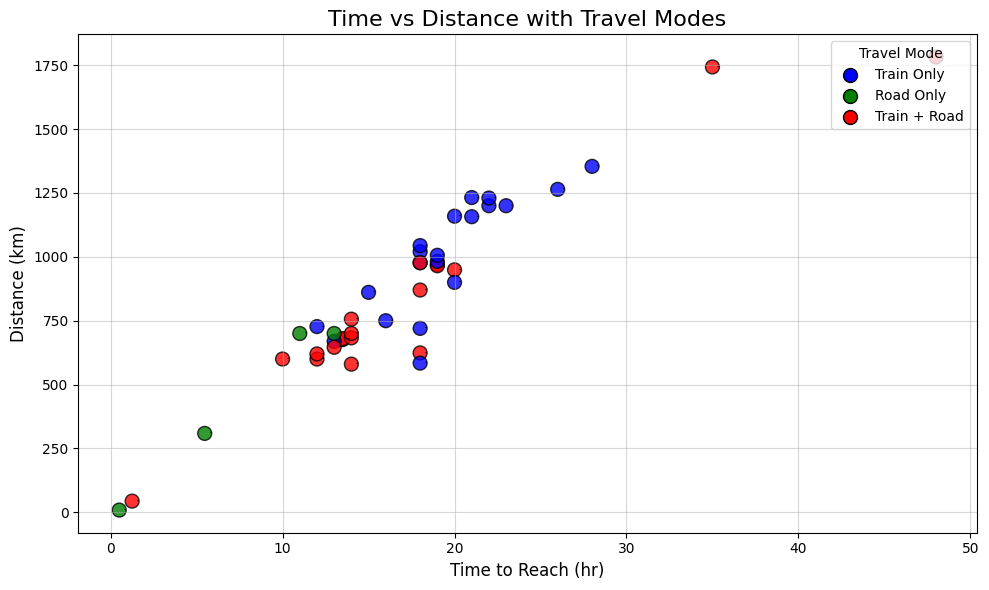

In [127]:
plt.figure(figsize=(10, 6))

plt.scatter(data["Time to Reach (hr)"], data["Distance (km)"], c=colors, s=100, alpha=0.8, edgecolor="k")

for i, location in enumerate(data["Location Name"]):
    plt.text(data["Time to Reach (hr)"][i] + 0.2, data["Distance (km)"][i], '.', fontsize=9)

plt.scatter([], [], color="blue", label="Train Only", s=100, edgecolor="k")
plt.scatter([], [], color="green", label="Road Only", s=100, edgecolor="k")
plt.scatter([], [], color="red", label="Train + Road", s=100, edgecolor="k")

plt.title("Time vs Distance with Travel Modes", fontsize=16)
plt.xlabel("Time to Reach (hr)", fontsize=12)
plt.ylabel("Distance (km)", fontsize=12)
plt.legend(title="Travel Mode", loc="upper right")
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


In [128]:
A = np.array([np.ones(data['Time to Reach (hr)'].shape), data['Time to Reach (hr)']])
A

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [18.  , 18.  , 13.5 , 13.5 , 18.  , 14.  , 18.  , 21.  , 26.  ,
        15.  , 13.  ,  1.25,  0.5 , 14.  , 35.  , 19.  , 18.  , 12.  ,
        14.  , 22.  , 16.  , 21.  , 13.  ,  5.47, 10.  , 20.  , 12.  ,
        48.  , 11.  , 18.  , 12.  , 19.  , 19.  , 18.  , 28.  , 23.  ,
        19.  , 20.  , 13.  , 18.  , 14.  , 20.  , 22.  ]])

In [129]:
y = np.array(data['Distance (km)'])
y

array([1020,  870,  676,  680,  977,  580,  977, 1157, 1264,  861,  669,
         44,    9,  756, 1743,  970, 1044,  727,  683, 1200,  750, 1232,
        700,  309,  600,  949,  600, 1782,  700,  720,  620,  965,  982,
        624, 1354, 1200, 1006,  900,  646,  584,  700, 1159, 1230])

In [130]:
w_hat = np.linalg.inv(A.dot(A.T)).dot(A).dot(y)
w_hat

array([135.62292013,  42.23139102])

In [131]:
# verify that the error vector is perpendicular to any vector in column space of A
e = (y - A.T.dot(w_hat))
e

array([ 124.2120415 ,  -25.7879585 ,  -29.74669891,  -25.74669891,
         81.2120415 , -146.86239442,   81.2120415 ,  134.51786844,
         30.36091333,   91.90621456,  -15.6310034 , -144.41215891,
       -147.73861564,   29.13760558,  129.27839415,   31.98065048,
        148.2120415 ,   84.60038762,  -43.86239442,  135.28647741,
        -61.32517646,  209.51786844,   15.3689966 ,  -57.62862901,
         42.06316966,  -31.25074054,  -42.39961238, -380.72968912,
         99.83177864, -175.7879585 ,  -22.39961238,   26.98065048,
         43.98065048, -271.7879585 ,   35.89813129,   93.05508639,
         67.98065048,  -80.25074054,  -38.6310034 , -311.7879585 ,
        -26.86239442,  178.74925946,  165.28647741])

In [132]:
data['error'] = e
data.describe()

,Time to Reach (hr),Distance (km),Train Only,Road Only,Train+Road,error
count,43.000000,43.000000,43.000000,43.000000,43.000000,4.300000e+01
mean,17.284186,865.558140,0.465116,0.093023,0.465116,3.278411e-13
std,7.836545,354.869815,0.504685,0.293903,0.504685,1.280854e+02
min,0.500000,9.000000,0.000000,0.000000,0.000000,-3.807297e+02
25%,13.250000,672.500000,0.000000,0.000000,0.000000,-4.313100e+01
50%,18.000000,861.000000,0.000000,0.000000,0.000000,2.698065e+01
75%,20.000000,1032.000000,1.000000,0.000000,1.000000,8.825330e+01
max,48.000000,1782.000000,1.000000,1.000000,1.000000,2.095179e+02


In [133]:
# error is perpendicular to A
A.dot(e)

array([1.42108547e-11, 3.01952241e-10])

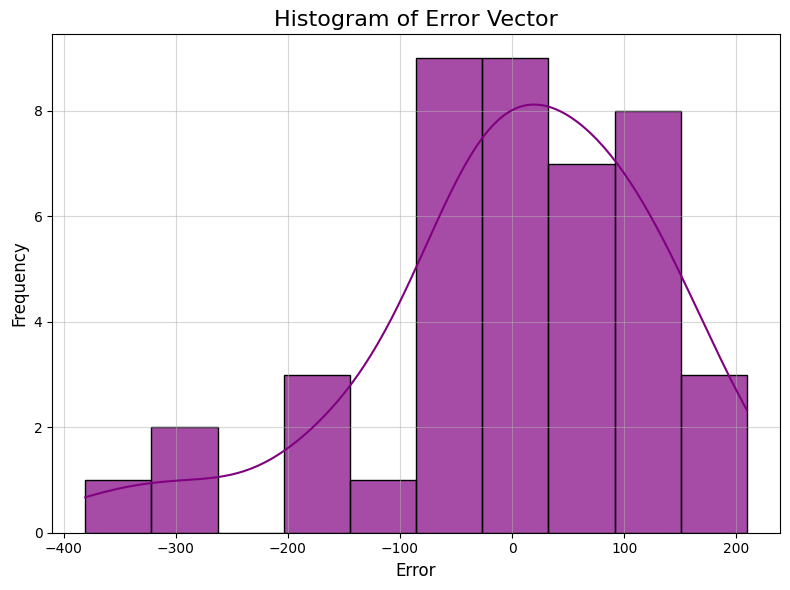

In [138]:

plt.figure(figsize=(8, 6))
sns.histplot(data["error"], kde=True, bins=10, color="purple", alpha=0.7, edgecolor="black")

plt.title("Histogram of Error Vector", fontsize=16)
plt.xlabel("Error", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


In [134]:
road_only = data[data['Road Only'] == 1]
road_only_A = np.array([np.ones(road_only['Time to Reach (hr)'].shape), road_only['Time to Reach (hr)']])
road_only_y = np.array(road_only['Distance (km)'])
road_only_w_hat = np.linalg.inv(road_only_A.dot(road_only_A.T)).dot(road_only_A).dot(road_only_y)
road_only_w_hat

array([-11.06834871,  58.80124774])

In [135]:
road_only_e = (road_only_y - road_only_A.T.dot(road_only_w_hat))
road_only_e

array([ -9.33227516, -53.34787194,  -1.57447644,  64.25462354])

In [136]:
road_only['road_only_error'] = road_only_e

<ipython-input-136-4733fb8f6d1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  road_only['road_only_error'] = road_only_e


In [137]:
road_only.describe()

,Time to Reach (hr),Distance (km),Train Only,Road Only,Train+Road,error,road_only_error
count,4.000000,4.000000,4.0,4.0,4.0,4.000000,4.000000e+00
mean,7.492500,429.500000,0.0,1.0,0.0,-22.541617,-1.776357e-13
std,5.645667,335.500124,0.0,0.0,0.0,105.384770,4.852567e+01
min,0.500000,9.000000,0.0,1.0,0.0,-147.738616,-5.334787e+01
25%,4.227500,234.000000,0.0,1.0,0.0,-80.156126,-2.033617e+01
50%,8.235000,504.500000,0.0,1.0,0.0,-21.129816,-5.453376e+00
75%,11.500000,700.000000,0.0,1.0,0.0,36.484692,1.488280e+01
max,13.000000,700.000000,0.0,1.0,0.0,99.831779,6.425462e+01
